# Google Play Store EDA

#### Importing the libraries

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading the dataset

In [138]:
df = pd.read_csv('googleplaystore.csv')

#### Display the first 10 rows of the dataset to get a quick look at the data

In [139]:
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


#### Display the total number of rows and columns in the dataset

In [140]:
rows, columns = df.shape
print(f"This dataset contains {rows} rows and {columns} columns.")

This dataset contains 10841 rows and 13 columns.


#### Display column names

In [141]:
print(df.columns)

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


#### Based on the publicly available Play Store metadata, the meaning of each column in the dataset is as follows:

- App - Name of the application as listed on the Google Play Store.
- Category - Primary category under which the app is classified.
- Rating - Average user rating of the app on a scale of 1 to 5.
- Reviews - Total number of user reviews submitted for the app.
- Size - Storage size of the app as reported on the Play Store.
- Installs - Approximate number of times the app has been installed by users.
- Type - Indicates whether the app is Free or Paid.
- Price - Price of the app (0 indicates a free app).
- Content Rating - Target age group suitability (e.g., Everyone, Teen, Mature).
- Genres - Specific genre or sub-genres associated with the app.
- Last Updated - Date when the app was most recently updated.
- Current Ver - Current version of the application.
- Android Ver - Minimum Android OS version required to run the app.


In [142]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


#### Display columns along with their data types

In [143]:
print(df.dtypes)

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


#### Obersvations on Data Types

Clearly Some columns in the dataset are **not in the proper data type** for analysis.  

For example, `Reviews`, `Size`, `Installs`, and `Price` are stored as `object` instead of numeric types,  
and `Last Updated` is stored as `object` instead of `datetime`.  

These columns will need **cleaning and type conversion** before the analysis.

#### Checking all unique values of each column

In [144]:
for col in df.columns:
    unique_vals = df[col].unique()
    print(f"Column Name : {col}")
    print(f"Number of unique values : {len(unique_vals)}")
    print(f"All unique values : {unique_vals}")
    print('-'*50)

Column Name : App
Number of unique values : 9660
All unique values : ['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Parkinson Exercices FR' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology']
--------------------------------------------------
Column Name : Category
Number of unique values : 34
All unique values : ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']
--------------------------------------------------
Column Name : Rating
Number of unique values : 

#### Summary from the observations

- Columns with correct types: App, Content Rating, Current Ver are mostly fine
- Columns needing conversions/cleaning: Reviews, Size, Installs, Type, Price, Last Updated, Android Ver
- Columns with anomalies/invalid entries are:
* Category (1.9)
* Rating (19.)
* Type (0),
* Installs (Free)
* Price (Everyone)
* Size (varies with device)
* Android Ver (varies with device)

#### Checking for missing values per column (including empty strings)

In [145]:
# Count of NaN / None values per column
nan_count = df.isnull().sum()

# Count of empty strings per column
empty_count = (df == '').sum()

# Total missing values (NaN + empty strings)
total_missing = nan_count + empty_count

# Percentage of missing values
missing_percent = (total_missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': total_missing,
    'Percentage (%)': missing_percent
}).sort_values(by='Percentage (%)', ascending=False)

print(missing_df)


                Missing Values  Percentage (%)
Rating                    1474       13.596532
Current Ver                  8        0.073794
Android Ver                  3        0.027673
Content Rating               1        0.009224
Type                         1        0.009224
Size                         0        0.000000
Reviews                      0        0.000000
Category                     0        0.000000
App                          0        0.000000
Price                        0        0.000000
Installs                     0        0.000000
Last Updated                 0        0.000000
Genres                       0        0.000000


#### Cleaning of the Data for Insights 

##### 1. App
- Type: Categorical / Object  
- Observations: Names of apps are unique and valid.  
- Treatment: No cleaning required. 

##### 2. Category
- Type: Object  
- Observations: Mostly fine, but one invalid entry '1.9'.  
- Treatment: Revoving the row with value of 1.9 and also converting the data type from object to category

In [146]:
# Remove invalid Category entry '1.9'
df = df[df['Category'] != '1.9']

In [147]:
# Converting data type from object to category
df['Category'] = df['Category'].astype('category')

##### 2. Rating
- **Type:** Float  
- **Observations:** Valid ratings are between 1 and 5; anomalies like `19` exist, and there are 1,474 missing values (~13.6%).  
- **Treatment:** Remove the anomaly with value `19` and replace missing values with **median** (preferred for skewed distributions) or **mean** if the data is roughly symmetric.


In [148]:
# Keep only ratings between 1 and 5
df = df[(df['Rating'] >= 1) & (df['Rating'] <= 5)]

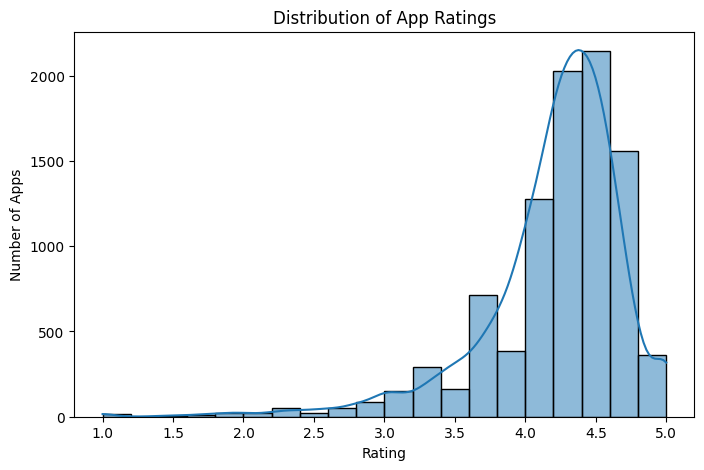

In [149]:
plt.figure(figsize=(8,5))
sns.histplot(df['Rating'], bins=20, kde=True) 
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Apps')
plt.show()


In [150]:
# Calculate mean and median
mean_rating = df['Rating'].mean()
median_rating = df['Rating'].median()

print(f"Mean Rating: {mean_rating}")
print(f"Median Rating: {median_rating}")


Mean Rating: 4.191757420456972
Median Rating: 4.3


The Rating distribution is left-skewed, indicating most apps have high ratings (3.5–5). Few apps are rated poorly. The median rating is 4.3, which is slightly higher than the mean 4.1 due to the left skew.


In [151]:
# Replace missing Rating values with median
df['Rating'].fillna(df['Rating'].median())


0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10834    4.0
10836    4.5
10837    5.0
10839    4.5
10840    4.5
Name: Rating, Length: 9366, dtype: float64

### 4. Reviews
- **Type:** Object 
- **Observations:** Needs conversion to numeric; no missing values.  
- **Treatment:** ✅ Convert to numeric type.  

In [152]:
# Converting data type from object to 
df['Reviews'] = df['Reviews'].astype('Int64') 

### 5. Size
- **Type:** Numeric (currently object)  
- **Observations:** Values like `'Varies with device'`; suffixes `'M'` or `'k'`.  
- **Treatment:** ❌ Replace `'Varies with device'` with NaN; convert `'M'/'k'` to numeric; fill missing with **median**.  


In [153]:
# Step 1: Replace 'Varies with device' with NaN
df['Size'] = df['Size'].replace('Varies with device', np.nan)

# Step 2: Remove trailing 'M' or 'k' and convert to numeric in KB format
def size_to_numeric(size):
    if pd.isna(size):
        return np.nan
    size = size.strip()
    if size[-1] == 'M':  # Megabytes
        return float(size[:-1]) * 1_000  # Convert M to KB (optional, or keep as MB)
    elif size[-1] == 'k':  # Kilobytes
        return float(size[:-1])
    else:
        return float(size)  # Already numeric

df['Size'] = df['Size'].apply(size_to_numeric)

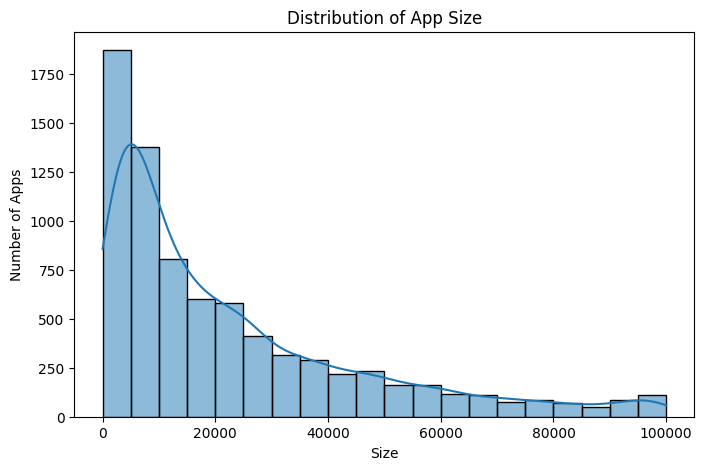

In [154]:
plt.figure(figsize=(8,5))
sns.histplot(df['Size'], bins=20, kde=True) 
plt.title('Distribution of App Size')
plt.xlabel('Size')
plt.ylabel('Number of Apps')
plt.show()

In [155]:
# Calculate mean and median
mean_rating = df['Size'].mean()
median_rating = df['Size'].median()

print(f"Mean Size: {mean_rating}")
print(f"Median Size: {median_rating}")

Mean Size: 22957.606870229007
Median Size: 14000.0


The Size distribution is right-skewed: most apps are small (<50 MB), but a few apps are very large (>500 MB). The median app size is 14 MB, while the mean is 23 MB, indicating that a small number of very large apps pull the average upward.


### 6. Installs
- **Type:** Numeric (currently object)  
- **Observations:** Values like `'10,000+'`; some anomalies like `'Free'`.  
- **Treatment:** ❌ Remove non-numeric values; remove commas and plus signs; convert to int; fill missing with **median**. 

In [156]:
import pandas as pd
import numpy as np

# Step 1: Replace non-numeric entries with NaN
df['Installs'] = df['Installs'].replace('Free', np.nan)

# Step 2: Remove commas and plus signs
df['Installs'] = df['Installs'].str.replace(',', '', regex=True)
df['Installs'] = df['Installs'].str.replace(r'\+', '', regex=True)  # escape +

# Step 3: Convert to numeric
df['Installs'] = df['Installs'].astype(int)

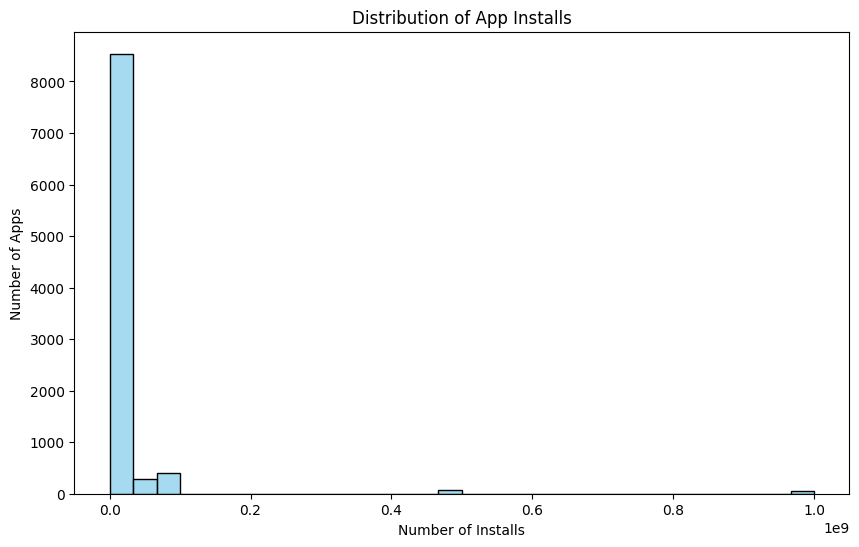

In [157]:
plt.figure(figsize=(10,6))
sns.histplot(df['Installs'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Number of Installs')
plt.ylabel('Number of Apps')
plt.title('Distribution of App Installs')
plt.show()


In [158]:
# Calculate mean and median
mean_rating = df['Installs'].mean()
median_rating = df['Installs'].median()

print(f"Mean Size: {mean_rating}")
print(f"Median Size: {median_rating}")

Mean Size: 17897443.726030324
Median Size: 500000.0


The Installs distribution is right-skewed: most apps have relatively few installs, but a few apps have very high installs (millions or even billions). The median number of installs is 500000, while the mean is much higher, indicating that a small number of extremely popular apps pull the average upward.


### 7. Type
- **Type:** Categorical / Object
- **Observations:** Mostly `'Free'` or `'Paid'`; one invalid value `'0'`.
- **Treatment:** :x: Replace invalid values with **Unknown**.

In [159]:
# Find the mode
type_mode = df['Type'].mode()[0]
print("Mode of Type:", type_mode)

# Replace invalid '0' and NaN with the mode
df['Type'] = df['Type'].replace('0', type_mode)
df['Type'] = df['Type'].fillna(type_mode)

# Step 4: Verify
print(df['Type'].unique())

df['Type'] = df['Type'].astype('category')


Mode of Type: Free
['Free' 'Paid']


### 8. Price
- **Type:** Numeric (currently object)
- **Observations:** Strings with `$`; some invalid entries like `'Everyone'`.
- **Treatment:** :x: Remove invalid entries; convert to float; fill missing with **median** (0 for free apps).

In [160]:
# Step 1: Replace invalid entries (like 'Everyone') with NaN
df['Price'] = df['Price'].replace('Everyone', np.nan)

# Step 2: Remove $ and convert to numeric
df['Price'] = df['Price'].str.replace('$', '', regex=False)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Step 3: Fill missing values
# Assuming missing price for Free apps is 0
df.loc[df['Type'] == 'Free', 'Price'] = df.loc[df['Type'] == 'Free', 'Price'].fillna(0)

# Verify
print(df['Price'].head())
print(df['Price'].dtype)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Price, dtype: float64
float64


### 9. Content Rating
- **Type:** Categorical / Object
- **Observations:** Mostly valid; 1 missing value.
- **Treatment:**  Fill missing with **mode**.

In [161]:
# Step 1: Check the mode
content_mode = df['Content Rating'].mode()[0]
print("Mode of Content Rating:", content_mode)

# Step 2: Fill missing values with mode
df['Content Rating'] = df['Content Rating'].fillna(content_mode)

# Step 3: Verify
print(df['Content Rating'].unique())

df['Content Rating'] = df['Content Rating'].astype('category')

Mode of Content Rating: Everyone
['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated']


### 10. Genres
- **Type:** Categorical / Object
- **Observations:** Multiple genres separated by `;`; generally fine.
- **Treatment:** :white_tick: No treatment needed; can split later for detailed analysis.

In [162]:
df['Genres'] = df['Genres'].astype('category')

### 11. Last Updated
- **Type:** Date / Object
- **Observations:** Needs datetime conversion.
- **Treatment:** :x: Convert to `datetime` type; missing values can be left if few.

In [163]:
# Step 1: Convert to datetime
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

# Step 2: Verify
print(df['Last Updated'].dtype)
print(df['Last Updated'].head())
print(df['Last Updated'].isna().sum())

datetime64[ns]
0   2018-01-07
1   2018-01-15
2   2018-08-01
3   2018-06-08
4   2018-06-20
Name: Last Updated, dtype: datetime64[ns]
0


### Current Ver
- **Type:** Categorical / Object  
- **Observations:** Mostly technical version info; 8 missing values.  
- **Treatment:** ❌ Dropped the column.  

**Reason:**  
`Current Ver` mainly provides the latest version of the app, which is a **technical detail** and does not contribute to **business insights** like app popularity, installs, ratings, or pricing. Since it has little analytical value, it has been removed to simplify the dataset.


In [164]:
# Drop the 'Current Ver' column
df = df.drop(columns=['Current Ver'])

# Verify
print(df.columns)


Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Android Ver'],
      dtype='object')


### 13. Android Ver
- **Type:** Categorical / Object
- **Observations:** Strings like `'4.0.3 and up'`; some `'Varies with device'`; 3 missing values.
- **Treatment:** :x: Extract numeric minimum version; replace `'Varies with device'` with NaN; fill missing with **median**.

In [165]:
import numpy as np
import re

# Step 1: Replace 'Varies with device' with NaN
df['Minimum Android Version Required'] = df['Android Ver'].replace('Varies with device', np.nan)

# Step 2: Extract the minimum numeric version
def extract_min_version(ver):
    if pd.isna(ver):
        return np.nan
    # Find all numbers like 4.0.3, 7.1 etc
    nums = re.findall(r'\d+\.\d+', ver)
    if nums:
        # Take the first one as minimum version
        return float(nums[0])
    else:
        return np.nan

df['Minimum Android Version Required'] = df['Minimum Android Version Required'].apply(extract_min_version)

# Step 3: Fill missing values with median
median_version = df['Minimum Android Version Required'].median()
df['Minimum Android Version Required'] = df['Minimum Android Version Required'].fillna(median_version)

# Step 4: Verify
print(df[['Android Ver', 'Minimum Android Version Required']].head(10))


    Android Ver  Minimum Android Version Required
0  4.0.3 and up                               4.0
1  4.0.3 and up                               4.0
2  4.0.3 and up                               4.0
3    4.2 and up                               4.2
4    4.4 and up                               4.4
5    2.3 and up                               2.3
6  4.0.3 and up                               4.0
7    4.2 and up                               4.2
8    3.0 and up                               3.0
9  4.0.3 and up                               4.0


In [166]:
df = df.drop(columns=['Android Ver'])
df['Minimum Android Version Required'] = df['Minimum Android Version Required'].astype('category')
df.dtypes

App                                         object
Category                                  category
Rating                                     float64
Reviews                                      Int64
Size                                       float64
Installs                                     int64
Type                                      category
Price                                      float64
Content Rating                            category
Genres                                    category
Last Updated                        datetime64[ns]
Minimum Android Version Required          category
dtype: object